In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scratchNNlib import NN
from scratchNNlib.Layers import LinearLayer
from scratchNNlib.Layers.ActivationLayers import ReLU, Softmax
from scratchNNlib.Loss import BinaryCrossEntropy

In [2]:
test_data = pd.read_csv('Training_Data/mnist_test.csv')
train_data = pd.read_csv('Training_Data/mnist_train.csv')

In [3]:
## 1D Data formats, superseded in next coded block by 2D formats

x_train = train_data.iloc[:,1:].to_numpy()
y_train = train_data['label'].to_numpy()

x_test = test_data.iloc[:,1:].to_numpy()
y_test = test_data['label'].to_numpy()

## Normalizing Data
x_train = x_train/255
x_test = x_test/255

In [4]:
x_train = x_train.reshape(60000, 784, 1)[:1000]
x_test = x_test.reshape(10000, 784, 1)

y_train = y_train.reshape(60000, 1, 1)[:1000]
y_test = y_test.reshape(10000, 1, 1)


In [5]:
def one_hot_encode(num: int, size: int = 10):
    out = np.zeros((1, size))
    out[0][num] =+ 1
    return out

In [6]:
class MNISTNeural(NN):
    def __init__(self):
        super().__init__()
        self.chain = [
            LinearLayer(784, 200),
            ReLU(),
            LinearLayer(200, 150),
            ReLU(),
            LinearLayer(150, 10),
            Softmax(),
        ]

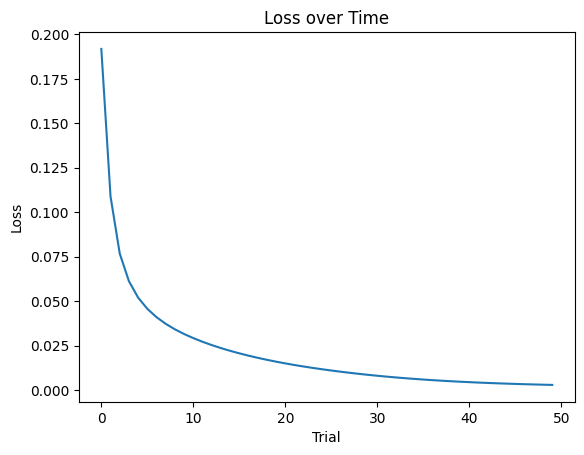

In [7]:
if __name__ == "__main__":
    epochs = 50
    lr = 0.01
    
    loss_function = BinaryCrossEntropy()
    model = MNISTNeural()
    
    samples = len(x_train)
    
    toPlot = [[i for i in range(epochs)], []]

    for i in range(epochs):
        error = 0
        for sample in range(samples):
            output = model.forwardProp(x_train[sample])
            #print(f'NN output: {output}, expected value: {y_train[sample]}')
            #print(f'sample: {one_hot_encode(y_train[sample])}')

            error += loss_function(output, one_hot_encode(y_train[sample]).T)
            
            #print(f'Loss: {error}')
        
            loss = loss_function.backward()
            #print(f'Gradiant: {loss}')
            model.backProp(loss, lr)
        error /= samples
        toPlot[1].append(error)
        #print('epoch %d/%d   error=%f' % (i+1, epochs, error))
        

plt.plot(*toPlot)
plt.title('Loss over Time')
plt.xlabel('Trial')
plt.ylabel('Loss')
plt.show()

In [8]:
scores = []
for x in x_test:
    scores.append(model.forwardProp(x))
predicted_class = np.argmax(scores, axis=1)
y = y_test.reshape(10000, 1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.87
